
Plot shows TRUE POSITIVE RATE (TP/(TP+FN)) plotted against the  
FALSE POSITIVE RATE (False Pos/(Fals Pos + True Neg))at different threshholds.
Thresholds are unique probability estimates of the positive class (Proba of prediction=1)
in descending order, the TPR and FPR are then calculated based on if the threshold for 
predicting 1 was that unique probability estimate of the positive class. 



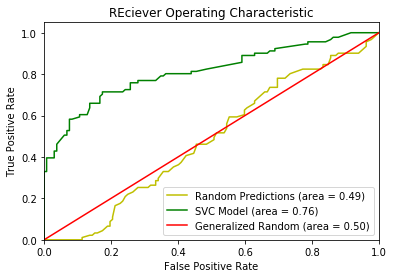

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, classification_report



data = pd.read_excel("C:\\Users\\graha\\Desktop\\TitanicTest\\Proof_of_random_vs_model_ROC.xlsx",
                    sheet_name='Proof_of_random_vs_model_ROC')





y_pred_rand = data.loc[:,'rand_pred']
y_pred_proba_rand = data.loc[:,'rand_prob']
y_test = data.loc[:,'Actual Survive']
y_pred_model = data.loc[:,'Pred Survive or No']
y_pred_proba_model = data.loc[:,'Predicted Prob of Survive(1)']
#print('1= Survived', '0= Did Not Survive')
#print(classification_report(y_test, y_pred))
roc_auc_rand = roc_auc_score(y_test, y_pred_rand)
fpr_rand, tpr_rand, thresholdsrand = roc_curve(y_test, y_pred_proba_rand)
roc_auc_model = roc_auc_score(y_test, y_pred_model)
fpr_model, tpr_model, threshmod = roc_curve(y_test, y_pred_proba_model)
print('''
Plot shows TRUE POSITIVE RATE (TP/(TP+FN)) plotted against the  
FALSE POSITIVE RATE (False Pos/(Fals Pos + True Neg))at different threshholds.
Thresholds are unique probability estimates of the positive class (Proba of prediction=1)
in descending order, the TPR and FPR are then calculated based on if the threshold for 
predicting 1 was that unique probability estimate of the positive class. 
''')
plt.figure()
plt.plot(fpr_rand, tpr_rand, label='Random Predictions (area = {:.2f})'.format(roc_auc_rand), color='y')
plt.plot(fpr_model, tpr_model, label='SVC Model (area = {:.2f})'.format(roc_auc_model), color='g')
plt.plot([0,1],[0,1],label='Generalized Random (area = 0.50)',color='r')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYoAAAEWCAYAAAB42tAoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOzdeZxN9f/A8ddn9sEsGGMZM8Y29rENIRVFpZRIpVTiW/3SIkXbV6lERaKUtHwryhIiO4WUhGxjGTN2g8FgxsyYfbn38/vjXNPsc5m5c2d5Px+P+3DvOZ9zzvveuc77nvPZlNYaIYQQojAO9g5ACCFE+SaJQgghRJEkUQghhCiSJAohhBBFkkQhhBCiSJIohBBCFEkShchFKfWlUuote8dRUSilDiqletnp2Fop1cwexy5tSqm1Sqlh17HdTUqpw7aISfxLEkUFpZSKVEqlKqWSlFLRSqnZSqkaOdbPVkplWNZffewrbr9a62e01u/ZNnrrKKVaK6VWKKUSlFKJSqlNSqkedoxntlJqYs5lWus2Wus/bHS8+kqpb5VS5y3v/5BS6l2lVHVbHO96Wb6LfUqyD611P631HCuOlSs5aq3/0lq3KMmxRfEkUVRs92itawAdgI7AG3nWT9Fa18jxaF/2IRZPKeVUwLKmwN/AAaAx0AD4BfhNKdW9LGKwJ6VULWAb4A5011p7AH0Bb6BpKR/Lbu9dGeQ8VN5preVRAR9AJNAnx+spwOocr2cDE4vYviewFYgHzgBPFLQd0B/Yaym3FQi2LH8d+DnPPj8FZlieewHfAueBs8BEwNGy7gmMJDAduFxQnMCPwJoCls8CNlueBwIaeBo4ZznWmBxlHSxxHgdigUVArTzb/gc4nWOfi4FoIAHYDLSxLH8ayAQygCRgZd6/A/CO5Rg/AInAQSAkRzydgFDLusXAwsL+RpbP6wDgUMTfUAPPAEeBOGAmoCzrmgK/W953DDAP8M7z/XkN2A+kA045PqtEIBwYmOd4TwEROdZ3svydzECq5XN51VK2G/9+v/YBvXLs5w9gkuU7kAo0syx70rK+GfCn5W8QAyy0LN9sec/JlmM9BPQConLs2x9YClyyvPfP7f1/tTI87B6APK7zD5f7BNXQclL5NMf62UWchAIs/9kfBpyB2kCHvNtZTgQXgRsAR2CY5biuQCMgBfC0lHXEOFF3s7xeBnwFVAd8gR3A/1nWPQFkAS9YTlDuBcQYDQwvYHlvwARU49+T/QLLcdpZThBXP5fRwHbL5+NqiWeBZd3VbX+wbOtuWT4C8LCU/wTYW9RnSv5EkQbcZfk8PgC2W9a5AKeAFy2f+SCMpFPY32g78G4x3wENrMK4ygiwvPc7LeuaYVyBuAJ1ME6yn+SJey/GifXqe38A48rNAeMknAzUz7HuLNAFUJb9N8r7GVhe+2GcpO+y7Kuv5XUdy/o/MJJzG8vf35nciWIBMM6yrRvQM897bpbjdS8sicLyme/D+AFSPe+28ijB+cbeAcjjOv9wxn/OJIwTvgY2kvsX42zLSSs+x2OOZd0bwC+F7Df7ZIjx6/29POsPA7dYnm8BHrc87wsctzyvi/Er1T3Hdg8DmyzPnwBOF/P+sq6e9PIsb2l5v378e7JvmWP9FOBby/MI4LYc6+pjXBU45di2SRExeFvKeOX9bPL8HXImig051rUGUi3Pb8Y40aoc67fk3V+OdUeBZ4r5jHSek+gi4PVCyt4HhOaJe0Qx+98LDLA8/xV4sYjvYs5E8RrwY54yvwLDLM//ACbkWf8H/yaKH4CvgYaFvOfCEkV3jGTpZOv/f1XtIfcGK7b7tHHvuhfGCdQnz/qpWmvvHI+rrUr8MW4xFKcRMEYpFX/1Ydm2gWX9fIwEAPCI5fXV7ZyB8zm2+wrjyuKqM8UcOwbjxJ5XfYxbHXGF7OtUjvgaAb/kiCEC42qkbkHbKqUclVIfKqWOK6WuYJwAIf/nWpToHM9TADdLHUAD4Ky2nNEKiDuvWAp+/8UdrwaAUspXKfWTUuqs5b3MJf/7yHV8pdTjSqm9OT6vtjm2sfY7A8bn/kCe703PPO+nqPf+KsZVyw5Lq7IRVh7XHziltc6ysrywkiSKSkBr/SfGr92pVm5yBusqRM8Ak/Ikm2pa6wWW9YuBXkqphsBA/k0UZzCuKHxybOeptW6TM+xijr0B43ZHXg8C27TWKTmW+ed4HoBRX3E1jn554nfTWp8tJI5HgAFAH4w6lkDLcmVlzEU5D/gppVSOZf6FFcZ4/wNLUNH7AUa8wVprT+BR/n0fV2W/H6VUI+Ab4HmgttbaGwjLsU1R35m8n8sZjCuKnJ97da31h0Vs8+8KraO11k9prRsA/wd8YWUz4DNAQHlrmFAZSKKoPD4B+iqlOlhRdh7QRyn1oFLKSSlVu5DtvgGeUUrdYGmdUl0pdbdSygNAa30J45bB98BJrXWEZfl54DfgY6WUp1LKQSnVVCl1yzW8n3eBHkqpSUqpWkopD6XUC8DjGLc2cnpLKVVNKdUGGI5RSQzwJTDJchJEKVVHKTWgiGN6YCS4WIw6kPfzrL8ANLmG95DTNoyrmectn/kAoGsR5acBnsCcHPH7KaWmKaWCrTieB8atyXillB/wSjHlq2OcvC9ZjjUc44riqv8BY5VSnS3fhWZX4yL/5zIXuEcpdYflKs1NKXX1B0WxlFIP5CgbZ4nLVMixctqBkZA/tHxX3ZRSN1pzTFE0SRSVhOWk/QOQs7Pcq3n6UcRYyp7GqGgcg9HqaC+Qr+ms1noXRkuXzzH+wx7DqF/IaT7GL/D5eZY/jlGBG27Z9mesu5Vy9dhHMW5XtMe4BXQeuB+4Q2v9d57if1pi24hxu+03y/JPgRUYTWoTMSqIbyjisD9g3Lo6a4l7e5713wKtLbdTlln7XizvJwOjAvs/GPVFj2JURKcXUv4y0AOjTuUfS/wbMVoCHbPikO9iNEZIAFZjtAQqKr5w4GOMhHYBo2HA3znWL8ZoqTQfo15sGVDLsvoD4E3L5zJWa30G48rsvxiJ5wxGorL2fNMF4z0nYfz9XtRan7SsewcjecYrpR7M8x5MwD0YFe2ngSiMSnlRQleb0glR4SilAoGTgHNFvC+tlPoH+FJr/b29YxGiKHJFIUQZUUrdopSqZ7n1NAwIBtbZOy4hiiOVPkKUnRYYTVhrYLQgGmypzxGiXJNbT0IIIYokt56EEEIUqcLdevLx8dGBgYH2DkMIISqU3bt3x2it61zPthUuUQQGBrJr1y57hyGEEBWKUurU9W4rt56EEEIUSRKFEEKIIkmiEEIIUSRJFEIIIYokiUIIIUSRJFEIIYQoks0ShVLqO6XURaVUWCHrlVJqhlLqmFJqv1Kqk61iEUIIcf1s2Y9iNsbw1D8Usr4f0NzyuAFj2s2ihoAWQohKwazNpGcVOMK8TWTEWjs5YcFslii01pstw0AXZgDwg2VqyO1KKW+lVH0ZJE0IURlprQmNDmXu/rksCFtAdFJ08RuV+KAwMAJmrC3ZbuzZM9uP3PPmRlmW5UsUSqmngacBAgICyiQ4IYQoDZHxkczbP4+5B+ZyKOYQzg7O9A/qT1e/rqh8s9OWHs/zl7nt44UE/XOKqAAFidc/AKw9E0VBn1CB70Rr/TXwNUBISIgMdyuEKNcup15m8cHFzD0wly2ntwBwU8BNvNT/JQa3Hkwt91rF7KEEMjNh2jT0u59iJp3IUbXwfW8LeLW+7l3aM1FEkXty+YbAOTvFIoQQJZKWlcbqI6uZe2Auq4+sJtOcSSufVky6dRKPtHuEQO9A2wexZQs88wwcPEhMTzj3Wlta3b4BF5e6JdqtPRPFCoyJ5n/CqMROkPoJIUR5diT2CD+H/4xZm3MtPxl3kiURS0hIT6BejXq80PUFHg1+lA71OqCU7W4vZYuNhddeg2+/JcvPm4iJYO7flzZtluDk5FHi3dssUSilFgC9AB+lVBTwNuAMoLX+ElgD3IUxUXwKMNxWsQghREn9deov7v3pXuLT4vOtq+FSg0GtBvFou0e5tfGtODo4lk1QWsOcOTB2LDo+nrj/dCTs/lB8Gg2lTcvvcHBwKZXD2LLV08PFrNfAc7Y6vhBClJalEUt5ZIlx+2j307sJ8MrdqMZBOeCgyrj/ckSEcZtp82Z0924cG1uDs7U24O//Ck2afIgqxXgq3HwUQghRFszazKojq/h428dsPrWZbg27serhVdSuVtu+gaWmwqRJMGUKukZ1Yj+4l8M3biPTdImmTafj7z+61A8piUIIIXJIyUxhzt45TN8+naOXjxLgFcDUvlN5tsuzuDu72ze4devguefgxAkSBgQRPvwU6V4rqOV1FwEBr+HtfbNNDiuJQghRKQxeNJiNJzeWeD+pmamkm9IJaRDCgvsXMLj1YJwc7HyqPHcOXnoJFi0iq2k9wqZBQqdT1Kv3OA0bvkT16q1senhJFEKISmFb1DYaeDSgT+M+JdqPk4MT97W8j54BPcumxVJRTCb44gsYNw4yMmDCBCIHXeRK7Ld07xaJi4tvmYQhiUIIUWForYlOiuZI7JHsR1RiFFprLqde5q5md/Fpv0/tHWbp2L0b/u//jH/79jUSRrNmcOwllHIusyQBkiiEEOXQlfQrHI09ypHYIxyOPZwrMSRmJGaXc3V0xd/LH0flSKB3IL0b97Zj1KUkIQHeegtmzgRfX/jpJ3jwQbDj1Y0kCiGEXWSYMjgZd7LAZHA+6d++twpFI+9GtKjdgh7+PQiqHURQ7SBa1G6Bv5d/2TdLtRWt4eef4cUXIToann0WJk4Eb297RyaJQghhO1prziWey5cMDsce5mTcSUzalF22TrU6BNUO4s5md2YngqDaQTSt1RQ3Jzc7vosycOKE0Zpp3Tro2BGWL4cuXfIVS0rax8WLC0s8JMe1kkQhhCix1MxUwi6G5UsGR2OPkpyZnF3O3cmdoNpBdKzXkSFthmRfHTSv3dy2A+WVVxkZMHUqvPceODnBJ58YCcMp/6k5Lm4TYWH34eTkSdu2v5RpmJIohBAldtsPt7Etahtg9FJu7N2YoNpB9GrUKzsZBNUOws/Tr/LcKiqpzZuNntUREXD//fDpp+DnV2DRixcXERHxGO7uzQkOXoubm3+B5WxFEoUQosSik6Lp06QPn/X7jCY1m+DiWDpjDFVKMTHwyiswezYEBsKqVXD33YUWj4qawbFjo/Hy6knbtstxdq5ZZqFeJYlCCGG12JRYnlz5JEdij+RafubKGXoG9KSlT0s7RVYBmM1GcnjlFbhyBV5/3WjdVK1agcW11pw48QZnzkzGx2cgrVrNw9HRPj3DJVEIIaxyKv4Ud8y9g8j4SO4OujvXLaTWdVrzePvH7RhdOXfwoHGbacsW6NkTvvwS2rQptLjZnMnhw//hwoUfadBgJM2bf4ZSZTQibQEkUQhRxZi1mQ/++oDY1Firt9Fas/DgQlKzUln/2HpuanSTDSOsWJKTI4iO/h6ts/KtU6mZ1Jr5D97f7sZcw4WY9/uSeH8bcPjWmGChEImJu0hI+IvGjScSEPBfu/cQl0QhRBVzNPYob256EzcnN5wdnK3ezt/Ln98G/0Zb37Y2jK5iiY/fTFjYAEymZBwccjfhrbkti2bT03CL1kT3c+LkSEeyvLfDhe3F7tfBwY0WLb6lfv0Rtgr9mkiiEKKCO51wmohLEVaXP3PlDADfD/ieIW2H2CqsSiUpaT8ZGbkn4ExNPcmxY6NxcwskJORX3NwaGSuiooxOc0uXQqtW8NMs6t1yC/XsEHdpkUQhRAU3aOEgdp/ffc3bebp62iCaysdkSmbXrk6AKd86T8/utGu3Emfn2pCVBZ9/blRQZ2XB++/DmDHgUvFbgEmiEKKCS85M5tbGtzKx90Srt3FzcqNDvQ42jKryMJszABN+fi/i6/tQ9nKlHKlRo4Mx3eiOHUZldWgo3HmnMU5Tkyb2C7qUSaIQohLwqeZDd//u9g6jUjKb0wBwd2+Cl1eezzghAca9bIzsWr8+LF5sdJ6z9/DkpUy6SAohRBFiY1cC4OnZ49+FWhujurZsCbNmwfPPGz2sBw+udEkC5IpCCCGKFB09h2rVWuPh0dlYcOyYMR7Tb79B586wciWEhNg3SBuTKwohhChESsoRrlzZSr16w1AZGcbgfW3bwrZt8Nln8M8/lT5JgFxRCFFhpWelc/DSQRLTE4svLK5LdPQPgAP1IhrD7e3h8GFjEqHp06FBA3uHV2YkUQhRASSmJ7Lvwj72nN9DaHQooedDOXjpIFlmozdwI69Gdo6w8tHaTGzEbIK/rIfLqgeNVkxr1xqtmqoYSRRClDOXki8RGh2aKykcu3wMjQbAt7ovHet1pF+zfnSq34mO9TvStGZTO0ddsZnN6aSkHMm5ANPXM+gw4SxOaY4wbpzxcLfPoHz2JolCCDvRWnM64XR2MtgTvYfQ86GcTTybXSbQO5CO9TryWPBj2Umhfo36dh/7p7I5cuQ5oqO/BaD6CQiaBl4HIb6DIx4/7sSxbUc7R2hfkiiEKAMms4kjsUdyJYW90Xu5nHoZMCb7aenTkl6BvehYryOd6neiQ70O1HQv+7kHqqKsrDjczX60WxqC+5cr0d41uDLjcZyeeBpHj3b2Ds/uJFEIUcrSs9IJuxiWKynsv7CflMwUAFwdXWlXtx33t7o/Oym0q9uOas4Fz0sgbMtszsBt/QGaT7mIa/RyePJJ1Icf4lm7tr1DKzckUQhRAonpieyN3mskBUu9Qvil8OxKZk9XTzrU68BTnZ7KTgotfVri7Gj9qK3CdrJORpD8n1totukSmS3qw+JFxnwRIhdJFEJYKT0rndDoULae2co/Z/8h9HwoRy8fzV7vW92XTvU7cXfzu+lYryMd63ekSc0mMkd0KdJak5i4g4sXF5GZaf18Gvlkmak1NwKfz/ZQw2zmyn8H4/n2vEoxgJ8tSKIQohDnE8+zLWobW89sZVvUNnad20WGKQMwmqN2btCZx9s/np0UpJLZdlJSjnHx4jwuXJhLauoxlHLFxeX6Bu6uEZZOk49iqX40k/gba6A/m0HNjsNLOeLKRRKFqJJiU2JZf2I9Wutcy2NSYrKTw6mEU4BRp9C5QWdGdR1Fd//udG/Ynfoe9e0RdpWSkXGJixcXcuHCXBIT/wEU3t69CQj4L3XqDMLJyevadhgXB2+8AV9/bXSWWzID74EDK+XYTKXNpolCKXUn8CngCPxPa/1hnvUBwBzA21Lmda31GlvGJATAlL+nMGXrlALX+Xn40cO/By/e8CI9/HvQoV4HXJ1cyzjCqslkSiEmZgUXLszl8uV1gInq1YNp0mQKvr4P4+bW8Np3qjXMnw8vvwwxMTB6NLz7Lnh4lHr8lZXNEoUyZgKfCfQFooCdSqkVWuvwHMXeBBZprWcppVoDa4BAW8UkKoYMU4bNh6WIS4vDw8WDnU/tzLXcw9WDBh5VZ2iG8kBrE3Fxm7hwYS4xMUswmZJwdW2Iv/9Y6tYdSo0aJWieeuQIPPssbNwIXbrAunXQsWr3ibgetryi6Aoc01qfAFBK/QQMAHImCg1cnWbLCzhnw3hEBbD73G76L+hPdFK0zY9Vp1odWvi0sPlxROEyM+MICxtAQsJfODp6UqfOQ9St+yje3jejStIIIC0NJk82Zplzdzfmi3j6aXB0LL3gqxBbJgo/4EyO11HADXnKvAP8ppR6AagO9CloR0qpp4GnAQICAko9UFE+/HrsV+5fdD8+1Xz45I5PbN5aqI1vG5vuXxQtLe0M+/ffSWrqMYKCvqZu3cdwdHQr+Y43bDCuIo4ehYcfhmnToF5FnrHa/myZKAqqIdJ5Xj8MzNZaf6yU6g78qJRqq7U259pI66+BrwFCQkLy7kNUUBeTLzJy9UhOxZ9Co9l/YT9t6rRhzdA1cvunkktKCmP//jsxmRIJDv6VmjV7lXynFy4Y9RDz50PTpvDrr3D77SXfr7BpoogC/HO8bkj+W0v/Ae4E0FpvU0q5AT7ARRvGJcqB45ePc+e8Ozl75Sy9G/dGoejSoAuT+0zGy+0aW7OICiU+fjNhYQNwcHCnY8e/qFEjuGQ7NJuNlkyvvw4pKfDWW0brpio6gJ8t2DJR7ASaK6UaA2eBIcAjecqcBm4DZiulWgFuwCUbxiTKgd3ndnPX/LvIMmex8fGNMtdzJZKVdYWoqE8xm1MLXG82p3H27Be4uQXSvv2vuLmVcHj0ffvg//7PmECod2+jLqJly5LtU+Rjs0Shtc5SSj0P/IrR9PU7rfVBpdQEYJfWegUwBvhGKfUSxm2pJ3Tehu2iUll/fD2DFg2itntt1j26jpY+8p+6MomL20Bk5HjAsdDKaC+vnrRpsxhn5xKMpZSUBG+/DZ9+CrVqwY8/wtCh0ifCRmzaj8LSJ2JNnmXjczwPB260ZQyi5KKTojkcc7jE+wm7GMboX0fTuk5r1g5dK/UQldDV6sWQkL3UqNHWNgdZtgxeeAGiooyWTB98YCQLYTPSM1sUa+DCgWyP2l4q++oV2ItlDy2Teghx7U6dglGjYMUKaNcOFi6EHj3sHVWVIIlCFCsxPZGbAm7i3V7vlmg/zo7O3OB3g4ycKq5NZiZ88gm8847x+qOP4MUXwVm+R2VFEoVg3bF1DF40mExzZoHrM0wZPND6AXo37l3GkYkqb+tWeOYZOHAA7r0XPvsMpC9VmZNEITgUc4jkzGRG3zAaN6eCOzzd3/r+Mo5KVGmXLxvNXb/5Bvz9jXqJAQPsHVWVJYlCZHu719t4u3nbOwxRlWkNc+fCmDFGshgzxrjlVKOGvSOr0iRRCCHKh0OHYORI+OMP6NYN1q+H9u3tHZVAEoUQ4holJPxNUtLeAtclJoZe+w5TU43B+yZPhurV4csv4amnwEFmBiwvrEoUSikXIEBrfczG8QghyrHk5HBCQ28BTIWWUcoVZ2cf63b422/GAH7Hjxsd5j7+GOrWLZ1gRakpNlEope4GpgEuQGOlVAfgba31QFsHJ0qf1poTcScw5xh38VKyjJoirHP8+Ks4Olanc+fdhc4w5+hYDUfH6kXv6Px5eOkloy9E8+bGiK+33WaDiEVpsOaKYgLG8OCbALTWe5VSzWwalbCJxPREBi8ezG/Hf8u3zkE54Owg7dJF4eLiNnL58mqaNJlMtWrXeQowmeCrr4xB+9LTjZnmXn0V3EpheHFhM9YkikytdXyeSeNlPKYK5kLSBe6efzd7o/cysfdEAr0Dc61v6NmQ6i7F/AoUVZbWJo4fH4urayP8/EZd30727DH6ROzcCX36GAP4NW9euoEKm7AmUUQopR4EHCwjwb4IlM54DqJABy8e5IHFD5CWlVZq+7ycepkMUwbLhyzn7qC7S22/ovJKSztFRMQw0tNPo3Um6elRtGo1/9onF0pMhPHjYcYMqFPHmC9iyBAZwK8CsSZRPA+MB8zAUozRYN+wZVBVXdjFMCJiIrgn6J5S69fg5ODEyJCRdPHrUir7E5VbUtI+9u/vh8mUgo/PPYCiWrWW+PoOsX4nWsPSpcZwG+fOGVcT778P3tJXp6KxJlHcobV+DXjt6gKl1CCMpCFs4OpQGpP7TKZVnVZ2jkZUNXFxfxAWNgBHRw86dtxyfaPAnjwJzz8Pa9YYfSGWLIEb8s6ELCoKaxoqv1nAsnGlHYgw7Dm/h7G/jaW2e238PP3sHY6oYi5eXMT+/Xfg6tqQTp22XXuSyMiADz+ENm3gzz+N+ap37ZIkUcEVekWhlLoDY5pSP6XUtByrPDFuQ4lS9vvJ3xnw0wBquddi09BNeLp62jskUYVERc3g2LHReHndSNu2K3B2rnltO/jrL6Nn9cGDMHCgMamQv3/x24lyr6hbTxeBMCANOJhjeSLwui2DqqqeX/M89WvUZ9OwTXI1IcqM1poTJ97gzJnJ+PgMpFWreTg6XsN807GxRhPX774zRnZdsQLuucd2AYsyV2ii0FqHAqFKqXla69JrfiMKlZKZQq/AXpIkRJkxmzM5fPhJLlz4gQYNRtK8+Wco5WjdxlrDnDkwdiwkJBjJYvx4YxgOUalYU5ntp5SaBLQGstvFaa2DbBaVEMLmsrKSOHhwMHFxv9K48UQCAv6LsrbJakSE0Ypp82ZjlrkvvzRmnROVkjWV2bOB7wEF9AMWAT/ZMCYhhI1lZFxk377exMVtoEWL/9Go0TjrkkRKCowbZ7RkOnDAmC/ir78kSVRy1iSKalrrXwG01se11m8CMtWZEBWUyZRGaGhPkpMP0rbtMurX/491G65bB23bGn0hHnkEDh+GJ5+UUV6rAGtuPaUr46fGcaXUM8BZwNe2YQkhbCUtLZLU1KMEBX2Jj0//4jc4dw5Gj4bFi6FFC9i0CXr1snmcovywJlG8BNQARgGTAC9ghC2DqmzmH5jP8cvHiy0XnxZfBtGIqk7rDAAcHQse/TWbyWSMxzRunNE/4r334JVXwNW1DKIU5UmxiUJr/Y/laSLwGIBSqqEtg6pMssxZPLr0UbSV4yi2qN3CxhGJqkprzYULP3L8+KsYQ3IU0R5l1y6jsnr3brj9dpg5E5rJoNFVVZGJQinVBfADtmitY5RSbTCG8rgVkGRhBa01Gs2EXhP4703/Lba8o4OVTROFuAZJSfs4cuQ5rlz5Gw+PGwgOXo2HR6f8BRMS4M03jcRQty789BM8+KAM4FfFFdUz+wPgfmAf8KZS6heMkWMnA8+UTXiVh4NykCQgylxmZjyRkeM5e3Ymzs61aNHiW+rVewKl8lRAaw0//2wM4BcdDc89BxMnglcxt6dElVDUFcUAoL3WOlUpVQs4Z3l9uGxCE0JcL63NREf/wIkTr5GZGUODBiNp3Pi9goflOHHCSAzr1kHHjrB8OXSRUYbFv4pKFGla61QArfVlpdQhSRLXLsOUYe8QRBWTlZXAwYMPEBe3Hk/P7gQHr8PDo2P+ghkZMHWqUUnt7GyMzfTss+BkTRsXUZUU9Y1oopS6OpS4AgJzvEZrPcimkVUSa4+tBZB5IESZSE8/x/79/UhJCSco6Evq138q/20mMEZ2HTnS6GE9eDB88gn4ydAxomBFJYr787z+3JaBVFaz987Gz8OP2xrLxPHCtjIyYtizp1XIz1gAACAASURBVAeZmTG0a7eaWrVuz1/o0iWjieucORAYCKtXw113lXmsomIpalDAjWUZSGV0IekC646tY2yPsVKRLWzuypVtpKefom3bFfmThNkM339vDNx35Qq88YbRuqlaNfsEKyoUuRlpQ/MOzMOkTQxrP8zeoYgqxNW1Qe4FYWHGbaYtW6BnT2MAvzZt7BOcqJBsOkiLUupOpdRhpdQxpVSBc1gopR5USoUrpQ4qpebbMp6yNmffHLr6dZXpTIV9pKTA668bLZkiIoz5Iv78U5KEuGZWX1EopVy11unXUN4RmAn0BaKAnUqpFVrr8BxlmgNvADdqreOUUhVqDKn4tHgS0xMLXHck9gj7L+xn5l0zyzgqITDqHp5/HiIjYfhwmDIFfHzsHZWooIpNFEqprsC3GGM8BSil2gNPaq1fKGbTrsAxrfUJy35+wuibEZ6jzFPATK11HIDW+uK1vwX7iE6KJmB6AJnmzELLuDi6MKTtkDKMSlQ1ZnMG8fGbiY1dSUzMclwvgfujr8GKjdCqlXEFcfPN9g5TVHDWXFHMAPoDywC01vuUUtYMM+4HnMnxOgrIO8N6EIBS6m/AEXhHa73Oin3b3eXUy2SaM/m/zv9HlwYFN30Nqh1ELfdaZRyZqOwyMi5x+fIaYmNXcfnyr5hMiTiYXWm2rin1vnBFmf42hgIfMwZcXOwdrqgErEkUDlrrU3kmNTFZsV1Bg8PkHRnPCWgO9MIYO+ovpVRbrXWuYVSVUk8DTwMEBARYcWjbyTRl8veZv5l/wKhOubXxrTzY5kG7xiQqj0uXfuHkybcAc4HrtTaRmnoU0Li41MfXdwh1T7XA6/UfUaH7oF8/+PxzaNKkTOMWlZs1ieKM5faTttQ7vAAcsWK7KMA/x+uGGMOA5C2zXWudCZxUSh3GSBw7cxbSWn8NfA0QEhJi3TCspSguNY61x9ay6sgq1h5bS3xaPC6OLtzZ7E56BvQs63BEJXb69PtkZV3Gy6vw75Wv78P4+NxDjazGqDffglmvQP36xnwR998vA/iJUmdNohiJcfspALgAbLAsK85OoLlSqjHGZEdDgEfylFkGPAzMVkr5YNyKOmFd6LaRkJbAlL+nkJKZgkazN3ovW05vwaRN+Fb3ZWDLgfQP6k/fJn3xcPWwZ6iikklODicxcRdNm07H33904QW1hoUL4aX+cPEijBoFEyaAp2fZBSuqFGsSRZbW+pprZLXWWUqp54FfMeofvtNaH1RKTQB2aa1XWNbdrpQKx7id9YrWOvZaj1Wa/oj8g/e3vE915+o4OjjS2Lsxr/d8nXuC7qGLXxccChoOQYhSEB09B6WcqFs37++pHI4dM8ZjWr8eQkJg1Sro3LnsghRVkjWJYqflltBCYKnWuuD2oAXQWq8B1uRZNj7Hcw28bHmUC1cnGNoyYgsd6nWwczSiqtDaxIULc6lVqx8uLgW0Ek9PN5q4TppkVFB/9pnRic5RevwL2yv257HWuikwEegMHFBKLVNKSZtPIUpRXNwGMjLOUa9eAb34N22C9u1h/Hi47z44dMjoIyFJQpQRq+6jaK23aq1HAZ2AK8A8m0YlRBUTHT0bJ6ea1K7d/9+FFy/C44/DrbdCZiasXWvMONegQeE7EsIGik0USqkaSqmhSqmVwA7gEtDD5pEJUUWYzenExCzD13cIDg6uxgB+33wDLVsaieHNN43xmu68096hiirKmjqKMGAlMEVr/ZeN4xGiyjGb0zCb03B3bw7798Mzz8C2bXDLLTBrltHDWgg7siZRNNFaF9z7RwhRKhxSwWvSCvjfK1CzpjFfxGOPSZ8IUS4UmiiUUh9rrccAS5RS+Tq5yQx3QpQOtXINXUeC24U/4Mkn4cMPoXZte4clRLairigWWv6Vme2EsIXTp2HUKByXLye1MVxY8gJ1B82wd1RC5FNoZbbWeoflaSut9cacD0BumgpxvbKy4OOPoXVr+O03kscPZ/fXoHt0tXdkQhTImuaxIwpY9p/SDsTeEtIS2Be9j5NxJ+0diqjMtm83elSPHQu9emEO28/Bu//BzaMZvr4yuKQon4qqo3gIY3ymxkqppTlWeQDxBW9Vcd0x9w7+OftP9mt3J3c7RiMqnbg4Y57qr782+kEsXQr33Uf0+W9ISQmnTZslODjIkOCifCqqjmIHEIsx6mvOadoSgVBbBmUPcWlx3Oh/I2O6j8HbzZug2kH2DklUBlrD/Pnw8ssQEwOjR8O774KHB1lZiZw8+RZeXj3x8Rlo70iFKFShiUJrfRI4iTFabJXg7+XPwFbyH1aUjrT9G0h/8j68diaT2MqJ4x96kxw0H/Ybc5lonU5WVjxNm65ESTNYUY4VdevpT631LUqpOHJPOKQwxvOTqduEKEhaGnz4IS7vv4eTq5kLb/ck/sFWuDs6kPeGppdXdzw9pRJblG9F3Xq6Ot1ppZ2R/WjsUT7a+hHppnTOJ56H+vaOSFR4GzYYw4AfPcql2yDjg1fx7zKZuvaOS4gSKOrW09Xe2P7AOa11hlKqJxAMzMUYHLDCik2J5c55dxKdFI1vdV9qV6vNLY1usXdYoqKKjjbmqJ4/H92sGUc/DyKmYzI3dHrb3pEJUWLWDOGxDOiilGoK/ACsBuYD/YvcqhzLMGVw/6L7OXvlLJuGbaK7f3d7hyQqKrMZvvrKaNGUmgrjx3NxRGPOnRxOyyZzcHSsZu8IhSgxaxKFWWudqZQaBHyitZ6hlKqwrZ601jy7+ln+PPUncwfOlSQhrt/evcYAfv/8YwwF/sUX0KIF0fvuxN29OXXrPmrvCIUoFdZ0uMtSSj0APAassixztl1ItvXJ9k/4NvRbxt00jqHBQ+0djqiIkpKM20whIXDiBPz4o1E30aIFAFpn4uJSFyXT5opKwtqe2b0xhhk/oZRqDCywbVi2sfrIasauH8ugVoOY0HuCvcMRFY3WsGyZMez3tGnGAH6HD8Ojj2aP8hoTs5Lk5P04OLjZOVghSo81U6GGAaOAXUqplsAZrfUkm0dWysIuhvHwkodpX7c9P9z3Aw7ya09ci1OnYMAAGDjQGAZ861b48kvjOZCaepz9+/sTFnYvzs6+NGnyoZ0DFqL0FFtHoZS6CfgROIvRh6KeUuoxrfXftg6utFxKvsQ9C+6hukt1Vjy8guou1e0dkqgoMjNh+nSjNzXA1KkwahQ4G3dfTaYUTp/+kNOnp+Dg4ELTph/j5/cCDg4V9u6sEPlYU5k9HbhLax0OoJRqhZE4QmwZWGlJz0pn0KJBRCdF8+cTf9LQs6G9QxIVxd9/G5XVYWHG1cSMGRAQABiNImJilnPs2GjS00/h6/sITZt+hKurzGctKh9rEoXL1SQBoLWOUEpVmNHLnl/zPFtOb2HB/Qvo6ic9YEXh0tJOce7cNzjEJ1Fr8h94LtpHVn1PYr4cRErfIMiaBSeMsomJe4iL+43q1dvSqtUfeHtLHxxReVmTKPYopb7CuIoAGEoFGhTw+73fM6LDCIa0HWLvUEQ5F33+B9K/mUTTWeCcCGceciByWCrmaqvgTO6yTk6eNG06DT+/5+U2k6j0rEkUz2BUZr+KUUexGfjMlkGVJrM24+fpZ+8wRHl36BB1h3+H+3bQ3bqhvvoK/+Bg/O0dlxDlQJGJQinVDmgK/KK1nlI2IQlRhlJT4f33YfJkXNwdODLGkeaT/wJHa35DCVE1FNpGVCn1X4zhO4YC65VSBc10J0TF9dtv0K4dTJyIfvABds/1IOOJe1CSJITIpajOBEOBYK31A0AXYGTZhCSEjZ0/D0OGwB13gKMjbNzI5U+HkuIRQ926w+wdnRDlTlGJIl1rnQygtb5UTFkhyj+TCWbOhJYtjR7W774L+/fDrbcSHT0HJ6fa1K59l72jFKLcKeoau0mOubIV0DTn3Nla60E2jawEtkdt54MtH2DWZnSuOZdElbVnj9EnYudO6NPHGMCveXMAMjPjiIlZToMGT8u81UIUoKhEcX+e15/bMpDStOzQMlYcXkGn+p3o0qALvQN7F7+RqJyuXIHx4+Gzz6BOHWP+6iFDssdmArh0aRFap1Ov3hP2i1OIcqyoiYs2lmUgpc3V0ZXdT++2dxjCXrSGJUvgxReNOomRI2HSJPD2zlUsPf0c5859TfXqbalRo6OdghWifJPmHaLyOXkSnn8e1qyBDh1g6VK44QbAGHojKWkPsbGriIlZSVKS8WMiKOhrVI6rDCHEv2yaKJRSdwKfAo7A/7TWBQ6pqZQaDCwGumitd9kyJlGJZWQYw39PmAAODsbzF17A7GDicsxKYmNXEhu7moyMc4DC07M7jRt/QO3a/alRo629oxei3LI6USilXLXW6ddQ3hGYCfQFooCdSqkVOceNspTzwOj5/Y+1+xYin7/+Mm4vHTwIgwbBJ5+Avz9am9i/727i4zfi6OhBrVp3ULv2PdSq1Q8Xlzr2jlqICqHYJq9Kqa5KqQPAUcvr9kopa4bw6Aoc01qf0FpnAD8BAwoo9x4wBUizPmwhLGJi4D//gZtvNmaeW7nSqJvwNwbfOHVqIvHxG2nW7BNuvDGGNm0WU6/e45IkhLgG1lxRzAD6Y/TSRmu9TyllTTMiP3IPpRYF3JCzgFKqI+CvtV6llBpb2I6UUk8DTwMEBASQnJFMrzm9uJR8qcDycWlxVoQnKjStYc4cGDsWEhLgtdfgrbeg+r9zjcTFbSIy8l3q1n0MP79RUgchxHWyJlE4aK1P5flPZrJiu4L+V2Z3alDGhMLTgSeK25HW+mvga4CQkBAdnRTNrnO76BnQk6Y1mxa4TXDdYCtCFBVSeLhxm2nzZrjxRpg1yxiKI4eMjItERAzF3b05zZt/IUlCiBKwJlGcUUp1BbSl3uEF4IgV20VBrsE3GwLncrz2ANoCf1j+E9cDViil7rW2QvvpTk/zWPvHrCkqKoOUFJg4ET76CDw94X//g+HDjYrrHLQ2ExHxGJmZlwkOXouTUw07BSxE5WBNohiJcfspALgAbMC6cZ92As2VUo0xplEdAjxydaXWOgHwufpaKfUHMFZaPYkCrV0Lzz1nNH0dNsxIFnUKrmc4fXoKcXG/ERT0JTVqtC/jQIWofIpNFFrrixgn+Wuitc5SSj0P/IrRPPY7rfVBpdQEYJfWesU1RyuqnnPnjE5zP/9sjNG0aRP06lVo8YSEvzl58k3q1HmQ+vWfLrs4hajEik0USqlvIP+ASVrrYv8Xaq3XAGvyLBtfSNlexe1PVCEmkzEe07hxkJlp3HIaOxZcXQvdJD5+M2FhA3Bza0SLFtKBTojSYs2tpw05nrsBA8k3MaQQpWjXLmMAv9274fbbjYTRtOBGC1ddurSU8PBHcHMLpH37X3Fy8iqjYIWo/Ky59bQw52ul1I/AeptFJKquhAR4801jKPC6dWHhQnjggVwD+OXfZCtnzkwjJmYpnp430K7dKpyda5dh0EJUftczhEdjoFFpByKqMK1h8WIYPRqio41K64kTwavgqwKzOYuYmGVERX3MlSvbcXKqSUDA6zRq9CaOjtXKOHghKj9r6iji+LeOwgG4DLxuy6BEFXL8uDGA37p10KkTrFgBISGFFk9I+JuIiMdISzuJm1sTmjX7jPr1h+PoWL3QbYQQJVNkolBGbWB7jOatAGattcwEJEouPR2mTjWuHJyd4dNPjSsJR8dCN7l0aRkREQ/j6upPmzZL8PEZgNG1RwhhS0UmCq21Vkr9orXuXFYBiSrgzz+NyupDh4w6iOnTwc+vyE3Onv2So0efw8OjC+3arcLFxafI8kKI0mPNPNg7lFKdbB6JqPwuXYInnjD6QaSnw+rVsGhRkUlCa83Jk+M5enQktWr1o0OHjZIkhChjhV5RKKWctNZZQE/gKaXUcSAZYwwnrbW2S/JIzkgmNDrUHocW18tshu+/h1dfNaYmfeMNo3VTtX8rnrU2k5QUitmcmWvT8+f/R3T0t9SrN4KgoK9wcJC5toQoa0X9r9sBdALuK6NYrHIo5hAPLH4AgOouUoFZ7oWFGQP4bdkCN91kDODXpk2+YocOjeDChTkF7qJRozcJDJwgHeiEsJOiEoUC0FofL6NYrOLi6MLyoctxc3KjZ0BPe4cjCpOcDO+9Bx9/bDRz/e4747ZTASf76Og5XLgwBz+/UdSq1S/XOheXOnh4SBWZEPakCmvEpJSKAqYVtqHWutB1tuTeyF2nnkq1x6GFtVavNlownToFI0bA5MngU3C9QnJyOLt3d8HTsyvt22+QVkxC2IhSarfWuvC250Uo6orCEahBwfNKCJFfVJQxgN/SpdC6tdG66eabCy1uMqUQHv4Qjo7VadVqniQJIcqpohLFea31hDKLRFRcWVnw2WcwfrwxmN8HH8DLL4OLS5GbHTs2muTkMIKDf8XVtUEZBSuEuFbF1lEIUaQdO+D//g/27oV+/Yxxmho3LnazCxcWcP78NwQEvEGtWreXQaBCiOtVVD+K28osClHxxMfDs89Ct25w8aIxX8Tq1VYliZSUYxw58jSenjcSGCgXrUKUd4UmCq315bIMRFQQWsOCBcYkQl99BaNGQUQE3H9/kaO85hQd/T0mUyqtWy+QfhFCVADyv1RY79gx4ypi/Xpj4L41a4yB/KyUlZVAVlYCmZmxODi44ObmX/xGQgi7k0QhipeebjRxff99Y4a5zz83xmoqYgC/vEymVLZta4jJlASAk5O3raIVQpQySRSiaL//bvSsPnIEHnoIpk2DBtfeQslsTsFkSsLX92Fq1uyDu3uQDYIVQtiCJApRsIsXYcwYmDsXmjQx5ou4444S79bTszv1648ohQCFEGXFmtFjRVViNsPXX0OLFsZUpG++aYzXVApJQghRMckVhfjX/v1G3cO2bcZQ4LNmGa2brlFWVhJRUR+TmflvwzmzWYZdEaKikkQhICkJ3n3XmECoZk2YMwcee8zq5q45ZWRc5MCBu0lM3I2TU+45r52d61C9ev6RY4UQ5ZskiqpuxQpjzuozZ+Cpp+DDD6FWrVxFUlNPkpISUeyuzOYMjh8fS0bGOdq2XY6Pzz22iloIUYYkUVRVp08bneWWL4e2bY1OdDfemK9YTMwqwsMftPrWkZNTLdq3/x0vr27XHFJmZiZRUVGkpaVd87ZCCIObmxsNGzbE2dm51PYpiaKqycyEGTPg7beNiuvJk+Gll6CAL9X5899x+PDT1KjRgebNP0Wp4r947u5NcXaufV2hRUVF4eHhQWBgoExSJMR10FoTGxtLVFQUja0YTsdakiiqku3bjQH89u+H/v2NEV8DA/MV01pz6tQkIiPfombN22nTZglOTjVsHl5aWpokCSFKQClF7dq1uXTpUqnuV5rHVgVxcUZrph494PJlY76IFSsKSRImjh59jsjIt6hb91HatVtZJkniKkkSQpSMLf4PSaKozLQ2Osy1bAn/+59xiyk8HAYOLLBF05UrO9i//27OnZuFv/+rtGw5BweHoueUEEJUfpIoKqvDh6FPH6OZa2Ag7NplzF/t4ZGrmNYmLl1aRmjoTezZcwNXrmynefPPadp0MkpVva+Ho6MjHTp0oG3bttxzzz3Ex8eXyn4jIyNp27Ztqewrp3feeQc/P7/smFesWFGi/fXq1Ytdu3YBcNdddxX5/pctW0Z4eHj26/Hjx7Nhw4YSHb8oqamp3HLLLZhMJpsdo6TWrVtHixYtaNasGR9++GGRZX/++WeUUtmfd0ZGBsOHD6ddu3a0b9+eP/74I7tsnz59iIuLs2XoRap6Z4LKLi3NqKgODobdu41Oc1u3QocOuYpprTl//lt27GjJwYMDSUs7Q9Om0+ne/Qx+fs/ZKXj7c3d3Z+/evYSFhVGrVi1mzpxp75CK9dJLL7F3714WL17MiBEjMJvNudZnZWVd137XrFmDt3fhgzfmTRQTJkygT58+13Usa3z33XcMGjQIRysHo9Ra5/ssbMlkMvHcc8+xdu1awsPDWbBgQa7PJ6fExERmzJjBDTfckL3sm2++AeDAgQOsX7+eMWPGZMf/2GOP8cUXX9j+TRRCKrMrkw0bjAH8jh2DRx4xriDq1ctXzKiHGMW5c1/g4dGV1q0X4eMzsFzNDXH06GiSkvaW6j6N1lufWF2+e/fu7N+/H4CkpCQGDBhAXFwcmZmZTJw4kQEDBhAZGUm/fv3o2bMnW7duxc/Pj+XLl+Pu7s7u3bsZMWIE1apVo2fPntn7TUtLY+TIkezatQsnJyemTZtG7969mT17NsuWLcNkMhEWFsaYMWPIyMjgxx9/xNXVlTVr1lArTx+XnFq1aoWTkxMxMTG8+uqr1KpVi9DQUDp16sSECRN44YUXOHDgAFlZWbzzzjsMGDCA1NRUhg8fTnh4OK1atSI19d9m0IGBgezatQsfHx9++OEHpk6dilKK4OBgRo4cyYoVK/jzzz+ZOHEiS5Ys4b333qN///4MHjyYjRs3MnbsWLKysujSpQuzZs3C1dWVwMBAhg0bxsqVK8nMzGTx4sW0bNmSP//8kxdffBEw7rFv3rwZjzxXv/PmzWP+/PlW/T169+7Ntm3bWLZsGYcPH+btt98mPT2dpk2b8v3331OjRg0mTJjAypUrSU1NpUePHnz11Vclur+/Y8cOmjVrRpMmTQAYMmQIy5cvp3Xr1vnKvvXWW7z66qtMnTo1e1l4eDi33WbMF+fr64u3tze7du2ia9eu3Hvvvdx0002MGzfuuuMrCZteUSil7lRKHVZKHVNKvV7A+peVUuFKqf1KqY1KqUa2jKfSio6GoUOhb1+j7mH9epg3r8AkYTKlcfDgg5w79wX+/q/SqdM2fH0fKFdJojwwmUxs3LiRe++9FzDapv/yyy/s2bOHTZs2MWbMGLTWABw9epTnnnuOgwcP4u3tzZIlSwAYPnw4M2bMYNu2bbn2ffUq5cCBAyxYsIBhw4Zl9x0JCwtj/vz57Nixg3HjxlGtWjVCQ0Pp3r07P/zwQ5Ex//PPPzg4OFCnTh0Ajhw5woYNG/j444+ZNGkSt956Kzt37mTTpk288sorJCcnM2vWLKpVq8b+/fsZN24cu3fvzrffgwcPMmnSJH7//Xf27dvHp59+So8ePbj33nv56KOP2Lt3L02bNs0un5aWxhNPPMHChQuzE9OsWbOy1/v4+LBnzx5GjhyZfaKcOnUqM2fOZO/evfz111+4u7vniiEjI4MTJ04QaGmAUdTf4/Dhwzz++OOEhoZSvXp1Jk6cyIYNG9izZw8hISFMmzYNgOeff56dO3cSFhZGamoqq1atyvfe582bR4cOHfI9Bg8enK/s2bNn8ff/d46Vhg0bcvbs2XzlQkNDOXPmDP3798+1vH379ixfvpysrCxOnjzJ7t27OXPmDAA1a9YkPT2d2NjYfPsrCzY7OyilHIGZQF8gCtiplFqhtc55LRYKhGitU5RSI4EpwEO2iqnSMZuNWebeeANSU41bTq+/Dm5uhW5y/PjLxMQspWnT6fj7jy7DYK/NtfzyL02pqal06NCByMhIOnfuTN++fQHjNsZ///tfNm/ejIODA2fPnuXChQsANG7cmA6WW3udO3cmMjKShIQE4uPjueWWWwDj1sHatWsB2LJlCy+88AIALVu2pFGjRhw5cgSA3r174+HhgYeHB15eXtxzj9G7vV27dtlXN3lNnz6duXPn4uHhwcKFC7N/FT/wwAPZt2l+++03VqxYkX1iTktL4/Tp02zevJlRo0YBEBwcTHBwcL79//777wwePBgfHx+AIq9qwDhRN27cmKAgYyj5YcOGMXPmTEaPNr5vgwYNyv6sli5dCsCNN97Iyy+/zNChQxk0aBANGzbMtc+YmJhct8GK+ns0atSIbt2MDp/bt28nPDycGy2dSTMyMujevTsAmzZtYsqUKaSkpHD58mXatGmT/XlfNXToUIYOHVrk+80ZU155r1DMZjMvvfQSs2fPzld2xIgRREREEBISQqNGjejRowdOTv+eon19fTl37hy1a19fP6WSsOXPyK7AMa31CQCl1E/AACA7UWitN+Uovx141IbxVC579xpNXv/5B269Fb74whjxtQjJyeGcO/c1fn7Pl+skYU9X6ygSEhLo378/M2fOZNSoUcybN49Lly6xe/dunJ2dCQwMzL4KcHV1zd7e0dGR1NRUtNaF3sYo6IRyVc59OTg4ZL92cHAotK7hpZdeYuzYsfmWV69ePdcxlyxZQosCviPF3W4p6r0UVr4oV9+To6Nj9nt6/fXXufvuu1mzZg3dunVjw4YNtMwxIKW7u3uuHvtF/T3yvu++ffuyYMGCXDGkpaXx7LPPsmvXLvz9/XnnnXcKHBFg3rx5fPTRR/mWN2vWjJ9//jnXsoYNG2ZfAYDRgbRBnrlbEhMTCQsLo1evXgBER0dz7733smLFCkJCQpg+fXp22R49etC8efNcMee90iortrz15AecyfE6yrKsMP8B1ha0Qin1tFJql1Jqlymr/LZ4KBOJifDyy9C5M5w8aTR/3bCh2CQBcPz4qzg61qBRo7fLINCKzcvLixkzZjB16lQyMzNJSEjA19cXZ2dnNm3axKlTp4rc3tvbGy8vL7Zs2QIYJ5yrbr755uzXR44c4fTp0wWewEvTHXfcwWeffZZ9Eg8NDc0XS1hYWIFXLbfddhuLFi3Kvu1x+bIxKrCHhweJiYn5yrds2ZLIyEiOHTsGwI8//ph9ZVWY48eP065dO1577TVCQkI4dOhQrvU1a9bEZDJln8yt/Xt069aNv//+OzuWlJQUjhw5kr0fHx8fkpKS8p30rxo6dCh79+7N9yiofJcuXTh69CgnT54kIyODn376KfvW5VVeXl7ExMQQGRlJZGQk3bp1y04SKSkpJCcnA7B+/XqcnJyy6ze01kRHR2ffeitrtkwUBf0EKfCnhlLqUSAEyJ+6Aa3111rrEK11iKOT9dNvVipawy+/QOvWxiivTz0Fhw4ZdRNW/NqLR/QWXQAAIABJREFUi9vI5curadRoHC4uPmUQcMXXsWNH2rdvz08//cTQoUPZtWsXISEhzJs3L9ev3cJ8//33PPfcc3Tv3j3XL8Fnn30Wk8lEu3bteOihh5g9e3auKwlbeOutt8jMzCQ4OJi2bdvy1ltvATBy5EiSkpIIDg5mypQpdO3aNd+2bdq0Ydy4cdxyyy20b9+el19+GTAqaz/66CM6duzI8ePHs8u7ubnx/fff88ADD9CuXTscHBx45plniozvk08+oW3btrRv3x53d3f69euXr8ztt9+enXit/XvUqVOH2bNn8/DDDxMcHEy3bt04dOgQ3t7ePPXUU7Rr14777ruPLl26WPdBFsHJyYnPP/+cO+64g1atWvHggw/Spo0xWvL48eOLbbp88eJFOnXqRKtWrZg8eTI//vhj9rrdu3fTrVu3XLeiypTW2iYPoDvwa47XbwBvFFCuDxAB+FqzX7cAN13lREZq3b+/1qB1cLDWW7de0+ZZWcl6x472euvWRjorK9VGQZZceHi4vUMQ5diePf/f3rnHVVWlffy7UBDxgggvZmri/YIgXjLLUrQyR4u0VMQaZbyblmmlM5lJpjPqpK/XcrzlZZgkbUrzzdGxQJS8ACoopFJqiZIhKSoi1/X+sQ+bw+UcDug5B2F9Px8+n3P2Xnut5zyHs5+9br/nuHz11VftbYZdeOONN+T+/fstLl/abwmIkRW8n1uzRxENtBFCtBBCOAEjgCIhVQjRBfgHECCl/M2KtjyY5OTA4sVaLyI8HD76SNsbYZiMs4Ts7GvExT1NRsYp2rRZTo0apie6FYrKTJcuXejbt2+l3nBnLTp16qQvnbUHVuvHSClzhRBTgb1ADWCjlDJBCDEPLbLtQhtqqgtsN0yW/SKlDDBZaXUiKkqbrD59GgYPhuXL4ZFHylVFRsYZTp8ezN27F/H23oGHx4tWMlahsA1jxlTPfOvjx4+3a/tWHfCSUn4DfFPs2PtGr623jfNB5fffYdYsTZupWTMtX0SA5bFTSkl6+iEuXVpCWtouatZ0pXPn/TRo8GTZFysUCkUpqF1WlQUpYetWeOstTe31nXfg/fehrmXKrfn5uaSm7iA5eQm3bsVQs6Y7zZu/R5MmU3ByamRl4xUKRVVGBYrKwJkzmvRGRIQ2/7BmjabVVA5++mkGly+vpHbttrRp8wkPPTSKGjVcrGOvQqGoVqhAYU8yM+Gvf9WyzNWpo+2yHjcOHMq/xiAtbTcNGw7Ex+fraqn6qlAorIe6o9iLvXu1XNXz58OIEZos+IQJFQoS2dlXuXv3Ag0a9FVB4h5ZsGAB3t7e+Pr64ufnx9GjRwkJCeEvf/lLkXInT56kQ4cOgCZQN3HiRFq1aoW3tze9e/fm6NGjJer28vLiqaeeKnKsQB68PBhLgVekzNChQzl//ny52rQlFy5c4LHHHqNNmzYEBgaSnZ1dokxxDSYHBwdOntREJLOzs5kwYQJt27alffv2uvbWqlWr+PTTT236WaoK6q5ia1JStMAwYADUrAnffgtbtoCnZ4WrTE/XROdcXS1fNqsoyeHDh9m9ezfHjx8nPj6e/fv306xZM4KCgggLCytSdtu2bYwcORKAcePG0bBhQ5KSkkhISGDTpk1cu3at1DZu3bqlyzz88MMP1v1ApZCQkEBeXp6ucGoJtl6OOmvWLKZPn05SUhJubm5s2LChRBnjHdNbt27Fy8tL19tasGABnp6enDt3jsTERH1X+JgxY1ixYoVNP0tVQQ092Yq8PC03xOzZkJUF8+bBzJlwH3bk3rx5GCEcqVu3230wtHLw5n/e5OSv91dm3O8hP5YNMC02mJKSgoeHh75LukAEDzRJjqNHj+r5Az7//HP27t3LTz/9xNGjRwkNDcXB0Bts2bKlyRvx8OHDCQsL4+233+azzz4jKChI34FrSn7cnBT4vn37SpXQNkVoaCgvvli4THry5MlER0eTmZnJ0KFD+eCDDwCt9zNmzBj27dvH1KlTefTRR5kyZQqpqam4uLiwbt062rdvz9dff838+fPJzs7G3d2d0NBQGjWq+OIJKSXfffedLic+evRoQkJCmDx5sslrCvxYwMaNG3UJEAcHB/17dHFxwcvLi2PHjpW6A11hGtWjsAXHj0PPnvD66/DYY9reiDlz7kuQAC1Q1K3bRW2mu0f69+/PpUuXaNu2La+99hoHDhzQzwUFBbFt2zZAUyR1d3enTZs2JCQk4OfnZ3EynaFDh+qKqV9//XURtVJT8uOmpMCvXbtmUkLbFFFRUXTrVvhAsWDBAmJiYoiPj+fAgQNFtJ6cnZ05dOgQI0aMYMKECaxcuZLY2Fg++ugjXnvtNQCefPJJjhw5wokTJxgxYgSLFy8u0ebZs2dLler28/MrkUEvLS2NBg0a6FIVpqS6jQkLC9MDRUF9c+bMoWvXrgwbNkxXlQXo3r07Bw8eNFufoiSqR2FNbt7UlriuXAn/8z/w2WcQGGiRNpOl5OfncOtWDI0bT7hvdVYGzD35W4u6desSGxvLwYMHCQ8PJzAwkIULFxIcHMyIESN44oknWLJkCdu2bSvyBFseGjZsiJubG9u2baNDhw64uBSuTDMlP25KCtychLYpUlJS9HwVoPWM1q5dS25uLikpKSQmJur1BwZqiv+3b9/m+++/Z9iwYfp1WVlZgKaQGhgYSEpKCtnZ2bRo0aJEm+3atdPnD8pCWiDVbczRo0dxcXHR53lyc3NJTk6mV69eLF26lKVLl/L222/rvTZPT88SgoOKslGBwhpICV98AdOmaXMSkyfDggVgJq1kRbl9O478/Ew1P3GfqFGjBv7+/vj7++Pj48PmzZsJDg6mWbNmeHl5ceDAAb744gs9GZG3tzdxcXHk5+frQ09lERgYyJQpU0rkJCjtJllAaTdLaUJC2xzGct0XLlzgo48+Ijo6Gjc3N4KDg4tIbRfIdefn59OgQYNSb/avv/46M2bMICAggIiICEJCQkqUOXv2rB50ihMREVEkz4SHhwc3btwgNzeXmjVrlirVbUzxoO3u7o6LiwtDhgwBtJwcxnMc9pTqfpBRQ0/3mwsX4PnnYdgwbYL6yBFYvdoqQQK0YSeA+vVVoLhXzp49S1JSkv7+5MmTNG9emHQxKCiI6dOn06pVKz2xTqtWrejevTtz584tkvFu586dJtsZMmQIM2fO5Lnnnity3JT8uCkpcFMS2ubo0KGDXv7mzZvUqVMHV1dXrl69qidWKk79+vVp0aIF27dvB7QAFRcXB2hy302aaNkDNm/eXOr1BT2K0v6K5+QWQtC3b19dxnvz5s1F5lSMyc/PZ/v27YwYMaLI9S+88AIREREAfPvtt0VSkZ47d67cq8wUKlDcP7Kz4W9/A29viIzUpMCjo8HKk2Y3bx7GyelhatVqVnZhhVlu377N6NGj6dixI76+viQmJhZ5Qh42bBgJCQlFbkwA69ev59dff6V169b4+Pgwfvx4s0/B9erVY9asWTg5ORU5bkp+3JQUuCkJbXMMGjRIv4l27tyZLl264O3tzZgxY/QhrNIIDQ1lw4YNdO7cGW9vbz0QhoSEMGzYMJ566qkik//3wqJFi1i6dCmtW7cmLS2NsWPHArBr1y7ef19XACIyMpKmTZuWWDiwaNEiQkJC8PX1ZevWrSxZskQ/FxUVxTPPKOWg8iLMdXcrI7Wb15aZP2eWXdCWHDyoCfglJsJLL2kCfsVSOVqLI0daULduNzp1Kj3xyoPEDz/8oO9NUFiHzMxM+vbtS1RUlMUT8FWFEydOsHTp0iJ5Hqoqpf2WhBCxUsruFalP9SjuhWvXYMwY6N0bMjLg66+1uQkbBYmsrF+5e/eimp9QWEzt2rX54IMPylxJVBW5du0aH374ob3NeCBRk9kVQUrYtEkT7ktP19Re58zRZDhsSHZ2CgDOzq1s2q7iwab43Eh14dlnn7W3CQ8sKlCUl8REbZjp4EHo1UsT8LPb5Jg2bFiexPcKhUJRXtTQk6XcuQPvvgudO0NCgpYvIjLSbkEiN/cW589r+kNOTk3sYoNCoageqB6FJezZA1OmaEtfg4O19KRGm5ZsTXb2VeLjB3L7dhzt2m2gfv0KzU8pFAqFRahAYY7Ll+HNN2HHDujQQcsXYRAYsyc//vgmd+78gI/PTtzdB9nbHIVCUcVRQ0+lkZcHK1ZowWH3bk0K/OTJShEkAHJyrlG3bhcVJKzA1atXGTlyJC1btqRbt248/vjjfPnll3azZ9OmTUydOhWANWvWsGXLlnuu08vLq1R1Wy8vL3x8fPD19aVPnz78/PPP99xWAeaECu+Fr776innz5lml7vuBlJI33niD1q1b4+vry/Hjx0st5+/vT7t27XQNrN9++w3QpFICAwNp3bo1jz32GBcvXgQ0PbDg4GAbfQoVKEoSE6Ntkps2DZ54QhPwmz0bim2OUlQ9pJQMHjyY3r17c/78eWJjY9m2bRvJyclWbTc3N9eicpMmTWLUqFFWtSU8PJz4+Hj8/f2ZP3++Vdu6HyxevFgXKLQES319v9izZw9JSUkkJSWxdu1asyq4oaGh+o51T0PagQ0bNuDm5saPP/7I9OnTmTVrFgA+Pj4kJyfzyy+/2ORzqKGnAtLT4b33NLmNhx6CsDBNhkOtKLIPb76p9eLuJ35+sMy02OB3332Hk5MTkyZN0o81b95cF+rLy8vjz3/+MxEREWRlZTFlyhQmTpyoaxx5eHhw+vRpunXrxj//+U+EEMTGxjJjxgxu376Nh4cHmzZtonHjxvj7+/PEE08QFRVFQEAAbdu2LVOuOyQkhLp16zJy5EgGDhyoHz916hTnz5/HxcWFSZMm6TePZcuW0atXL9LS0ggKCiI1NZUePXqY1ZQq4PHHHy+Su2Hw4MFcunSJu3fvMm3aNCZM0EQo69aty7Rp09i9eze1a9dm586dNGrUiAsXLjBy5Ehyc3MZMGCAXo+UkpkzZ7Jnzx6EELz33nsEBgYSERHB3LlzadSoESdPnuSll17Cx8eH5cuXk5mZyVdffUWrVkWXgZ87d45atWrpO8JNSZ6HhIRw5coVLl68iIeHB1u3bi31e7x9+zYvvvgi169fJycnh/nz55uUD7GUnTt3MmrUKIQQ9OzZkxs3bpCSkkLjxo0tvr5AHWDo0KFMnToVKaUuVbJt2zZmzpx5TzZagupRSKkFhfbttSAxdSr88AMMH16pgkRW1mWSkt7k7NnxZGQk2tucKklCQgJdu3Y1eX7Dhg24uroSHR1NdHQ069at48KFC4C263fZsmUkJiZy/vx5oqKiyMnJ4fXXX2fHjh3ExsYyZswYZs+erdd348YNDhw4wFtvvWWRXHcBDz/8sP7kOX78eF5++WWaN2/OtGnTmD59OtHR0XzxxReMGzcOgA8++IAnn3ySEydOEBAQYNFT6H/+8x8GDx6sv9+4cSOxsbHExMSwYsUK0tLSAMjIyKBnz57ExcXRu3dv1q1bB8C0adP0XBcPPfSQXs+///1vTp48SVxcHPv37+edd94hJUXbDxQXF8fy5cs5deoUW7du5dy5cxw7doxx48axcuXKEjZGRUUV+b7M+TA2NpadO3fyr3/9y+T36OzszJdffsnx48cJDw/nrbfeKjWoBgYGliqZXtqw4OXLl2nWrFBex5xs+p/+9Cf8/Pz48MMP9XaNr69Zsyaurq66720pmV69exQ//aStZtq7F7p21XZWd698K4gyMn4gPv45srOv4uioPT01aNDbzlZZGTNP/rZiypQpHDp0CCcnJ6Kjo9m3bx/x8fG6YF16ejpJSUk4OTnRo0cPXSjQz8+Pixcv0qBBA06fPq1v9MrLyyvyJGmsqGqJXHdxoqKiWL9+vX6z2L9/P4mJhQ8RN2/e5NatW0RGRuo5MAYNGoSbm5vJOvv27cvVq1fx9PQsMvS0YsUKfa7m0qVLJCUl4e7ujpOTE88//zwA3bp147///a9uW0EK0j/+8Y/6kMmhQ4cICgqiRo0aNGrUiD59+hAdHU39+vV59NFHdf+0atWK/v37A9owS3h4eAlbi0umm/NhQECArhpr6nts2rQp7777LpGRkTg4OHD58mWuXr1aJNABJbIdmsNS2fTQ0FCaNGnCrVu3ePnll9m6dSujRo0ye72npydXrlyx2JZ7oXoGiqws+PvfNelvR0dt4vq116ASat+kp3/PqVPPI4QTXbseoV69LvY2qcri7e2t39xASyR07do1uhseHqSUrFy5ssTO5oiICD0rHmhS5bm5uUgp8fb21iXJi1PHaCe/JXLdxqSkpDB27Fh27dqlTxTn5+dz+PDhUmW0Ld2UGR4eTp06dQgODub9999n6dKlREREsH//fg4fPoyLiwv+/v66HLmjo6Ned8HnNtemuWEvYx86ODjo7x0cHEqdW6hduzbp6en6e3M+NPa1qe9x06ZNpKamEhsbi6OjI15eXkVk1wsIDAzk7NmzJY7PmDGjxBxS06ZN9dS3gEnZ9AIF3nr16jFy5EiOHTvGqFGj9OubNm1Kbm4u6enpNGzYELCtZHr1G3o6cEAbq54zB154Ac6c0TLPVcIgce3aLuLinsbR0YOuXQ+rIGFl+vXrp2eUK+DOnTv66+eee45PPvmEnJwcQBsjz8jIMFlfu3btSE1N1QNFTk4OCQkJpZa1RK67gJycHIYPH86iRYto27atfrx///6sWrVKf1+QP8JYpnzPnj1cv37dbP21a9dm2bJlbNmyhd9//5309HTc3NxwcXHhzJkzHDlyxOz1AL169dIzAha0XWBLWFgYeXl5pKamEhkZWeG0pMaS6WC5D019j+np6Xh6euLo6Eh4eLjJVV9hYWGlSqaXttAgICCALVu2IKXkyJEjuLq6lpifyM3N1Veh5eTksHv3bl0KPSAgQP8sO3bsoF+/fnoAtqVkevUJFKmp2mY5f3+tR/HNN/D552BGDtqeXLmyjtOnh1Cnjg9dukRRu3bZQxGKe0MIwVdffcWBAwdo0aIFPXr0YPTo0SxatAiAcePG0bFjR7p27UqnTp2YOHGi2VU0Tk5O7Nixg1mzZtG5c2f8/Pz4/vvvSy1bHrnu77//nujoaObOnauPj1+5coUVK1YQExODr68vHTt2ZM2aNQDMnTuXyMhIunbtyr59+3jkkUfK9EXjxo0JCgpi9erVDBgwgNzcXHx9fZkzZw49e/Ys8/rly5ezevVqHn300SJP/UOGDMHX15fOnTvTr18/Fi9eXGJox1J69+7NiRMn9F6KpT409T2+8sorxMTE0L17d0JDQ2nfvn2F7DJm4MCBtGzZktatWzN+/Hg+/vhj/Zyfnx+gLYF97rnn8PX1xc/PjyZNmjB+/HgAxo4dS1paGq1bt2bp0qUsXLhQvz48PJxBg2yzRL7qy4zn58PGjTBzJty+rQn5zZ4NRikoKwtSSq5f38+lS0u4fn0vDRv+AW/v7dSoYVuxQXuhZMYV5WXatGm88MIL1S7HRFZWFn369OHQoUN6fnFj7rfMeNWeozh9WhPwi4rSpMA/+QSMsl1VFvLzs7h69TOSk5eSkXEKJ6eHaNHirzRr9jYODo72Nk+hqLS8++67HD161N5m2JxffvmFhQsXlhokrEHVDBQZGTBvHixdCq6u8OmnMHp0pVnumpubTlLS62Rmamk3MzMvkJNzlTp1fGjX7lMaNQrCwaFWGbUoFIpGjRoREBBgbzNsTps2bWjTpo3N2qt6gWL3bm0vxM8/a0mFFi8Gd3d7W6WTlZVCfPwfuHMngQYN+gKCBg1607jxONzcnq32kuEFm4kUCkXFsMZ0QtUJFMnJ8MYb8OWX2vBSZCQ89ZRdTZJScudOIr//vo/c3HRA8uuvm8nNTcPH5/9o2LC/Xe2rbDg7O5OWloa7u7sKFgpFBZBSkpaWhrOz832t98EPFLm5sHIlvP++Jub3t7/BjBl202bKz8/ixo0DpKXtJi1tN3fvXihyvlatZvj5RVCvXje72FeZadq0KcnJyaSmptrbFIXigcXZ2Vnf/Hm/eLADxbFjMHGipgk0cCCsWgUW7Gi93+Tm3iY1dQdpaV9z/fo+8vJu4+DgjJvbMzzyyJ9xdx9ErVoquVBZODo6WrQjWaFQ2BarBgohxABgOVADWC+lXFjsfC1gC9ANSAMCpZQXy6z4xg0t29yaNdC4sZYv4qWX7DZZff78LK5c+RgnpyZ4er6Cu/vzuLn1o0aNyrcEV6FQKMqL1QKFEKIGsBp4FkgGooUQu6SUxop2Y4HrUsrWQogRwCIgsGRthbhm5GkCfqmpmhT4vHlQr561PoZF5OXdplatZvTs+bMaW1coFFUOa/YoegA/SinPAwghtgEvAsaB4kUgxPB6B7BKCCGkmWn7pmk53GqfStL8WmS0Ww8n11vH+nKQl5eJs3NzFSQUCkWVxJqBoglwyeh9MvCYqTJSylwhRDrgDhRJvyWEmABMMLzNqn8m/zTjy7E72yacB2weKDwo5qtqjPJFIcoXhShfFNKuohdaM1CUdtcs3lOwpAxSyrXAWgAhRExFt6FXNZQvClG+KET5ohDli0KEEDEVvdaaooDJQDOj902B4uLpehkhRE3AFfjdijYpFAqFopxYM1BEA22EEC2EEE7ACGBXsTK7gNGG10OB78zNTygUCoXC9lht6Mkw5zAV2Iu2PHajlDJBCDEPiJFS7gI2AFuFED+i9SRGWFD1WmvZ/ACifFGI8kUhyheFKF8UUmFfPHAy4wqFQqGwLdUncZFCoVAoKoQKFAqFQqEwS6UNFEKIAUKIs0KIH4UQfy7lfC0hRJjh/FEhhJftrbQNFvhihhAiUQgRL4T4VgjR3B522oKyfGFUbqgQQgohquzSSEt8IYQYbvjfSBBC/MvWNtoKC34jjwghwoUQJwy/k4H2sNPaCCE2CiF+E0KcNnFeCCFWGPwUL4ToalHFUspK94c2+f0T0BJwAuKAjsXKvAasMbweAYTZ2247+qIv4GJ4Pbk6+8JQrh4QCRwButvbbjv+X7QBTgBuhvee9rbbjr5YC0w2vO4IXLS33VbyRW+gK3DaxPmBwB60PWw9gaOW1FtZexS6/IeUMhsokP8w5kVgs+H1DuBpUTU1NMr0hZQyXEp5x/D2CNqelaqIJf8XAB8Ci4G7tjTOxljii/HAainldQAp5W82ttFWWOILCdQ3vHal5J6uKoGUMhLze9FeBLZIjSNAAyFE47LqrayBojT5j+I63UXkP4AC+Y+qhiW+MGYs2hNDVaRMXwghugDNpJS7bWmYHbDk/6It0FYIESWEOGJQc66KWOKLEOBVIUQy8A3wum1Mq3SU934CVN58FPdN/qMKYPHnFEK8CnQH+ljVIvth1hdCCAfgf4FgWxlkRyz5v6iJNvzkj9bLPCiE6CSlvGFl22yNJb4IAjZJKZcIIR5H27/VSUqZb33zKhUVum9W1h6Fkv8oxBJfIIR4BpgNBEgps2xkm60pyxf1gE5AhBDiItoY7K4qOqFt6W9kp5QyR0p5ATiLFjiqGpb4YizwOYCU8jDgjCYYWN2w6H5SnMoaKJT8RyFl+sIw3PIPtCBRVcehoQxfSCnTpZQeUkovKaUX2nxNgJSywmJolRhLfiNfoS10QAjhgTYUdd6mVtoGS3zxC/A0gBCiA1qgqI45d3cBowyrn3oC6VLKlLIuqpRDT9J68h8PHBb64u9AXWC7YT7/FyllgN2MthIW+qJaYKEv9gL9hRCJQB7wjpQyzX5WWwcLffEWsE4IMR1tqCW4Kj5YCiE+Qxtq9DDMx8wFHAGklGvQ5mcGAj8Cd4A/WVRvFfSVQqFQKO4jlXXoSaFQKBSVBBUoFAqFQmEWFSgUCoVCYRYVKBQKhUJhFhUoFAqFQmEWFSgUlQ4hRJ4Q4qTRn5eZsl6mlDLL2WaEQX00ziB50a4CdUwSQowyvA4WQjxsdG69EKLjfbYzWgjhZ8E1bwohXO61bUX1RQUKRWUkU0rpZ/R30UbtviKl7IwmNvn38l4spVwjpdxieBsMPGx0bpyUMvG+WFlo58dYZuebgAoUigqjAoXigcDQczgohDhu+HuilDLeQohjhl5IvBCijeH4q0bH/yGEqFFGc5FAa8O1TxtyGJwyaP3XMhxfKApzgHxkOBYihHhbCDEUTXMr1NBmbUNPoLsQYrIQYrGRzcFCiJUVtPMwRoJuQohPhBAxQss98YHh2BtoAStcCBFuONZfCHHY4MftQoi6ZbSjqOaoQKGojNQ2Gnb60nDsN+BZKWVXIBBYUcp1k4DlUko/tBt1skGuIRDoZTieB7xSRvsvAKeEEM7AJiBQSumDpmQwWQjREBgCeEspfYH5xhdLKXcAMWhP/n5Sykyj0zuAl4zeBwJhFbRzAJpMRwGzpZTdAV+gjxDCV0q5Ak3Lp6+Usq9ByuM94BmDL2OAGWW0o6jmVEoJD0W1J9NwszTGEVhlGJPPQ9MtKs5hYLYQoinwbyllkhDiaaAbEG2QN6mNFnRKI1QIkQlcRJOhbgdckFKeM5zfDEwBVqHlulgvhPg/wGJJcyllqhDivEFnJ8nQRpSh3vLYWQdNrsI4Q9lwIcQEtN91Y7QEPfHFru1pOB5laMcJzW8KhUlUoFA8KEwHrgKd0XrCJZISSSn/JYQ4CgwC9gohxqHJKm+WUv7FgjZeMRYQFEKUmt/EoC3UA01kbgQwFehXjs8SBgwHzgBfSiml0O7aFtuJlsVtIbAaeEkI0QJ4G3hUSnldCLEJTfiuOAL4r5QyqBz2Kqo5auhJ8aDgCqQY8gf8Ee1pughCiJbAecNwyy60IZhvgaFCCE9DmYbC8pziZwAvIURrw/s/AgcMY/quUspv0CaKS1t5dAtN9rw0/g0MRsuREGY4Vi47pZQ5aENIPQ3DVvWBDCBdCNEI+IMJW44AvQo+kxDCRQhRWu9ModBRgULxoPAxMFoIcQRt2CmjlDKBwGkhxEmgPVp2yB7bAAAArklEQVTKx0S0G+o+IUQ88F+0YZkykVLeRVPX3C6EOAXkA2vQbrq7DfUdQOvtFGcTsKZgMrtYvdeBRKC5lPKY4Vi57TTMfSwB3pZSxqHlx04ANqINZxWwFtgjhAiXUqaircj6zNDOETRfKRQmUeqxCoVCoTCL6lEoFAqFwiwqUCgUCoXCLCpQKBQKhcIsKlAoFAqFwiwqUCgUCoXCLCpQKBQKhcIsKlAoFAqFwiz/DxBsf9WZz0/kAAAAAElFTkSuQmCC Rate')
plt.title('REciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Above:  Proving that red dash line is a general representation for how well a model would preform when randomly generating predicitons for binary classification.
Yellow line= random predictions generated by creating random proba estimates through random number generator from 0-100 divided by 100.  This proba is compared against real world outcomes to create false positive and true positive rates. 
Green Line= SVC model and its proba estimates compared against real world outcomes

Below:

Recreating roc_curve to fully understand how it gets plotted, below shows that my code is the same as the roc_curve() function


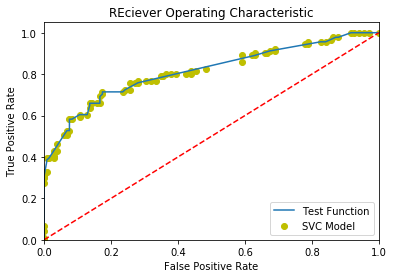

[0.99 0.98 0.97 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87 0.85 0.83
 0.82 0.81 0.8  0.78 0.77 0.75 0.74 0.73 0.72 0.69 0.68 0.66 0.65 0.61
 0.45 0.41 0.4  0.38 0.34 0.33 0.31 0.28 0.27 0.26 0.25 0.22 0.21 0.2
 0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.09 0.08 0.07 0.06 0.05
 0.04 0.03]
[0.011 0.022 0.033 0.088 0.132 0.165 0.209 0.22  0.231 0.297 0.308 0.374
 0.385 0.396 0.527 0.527 0.538 0.549 0.56  0.571 0.582 0.582 0.604 0.604
 0.604 0.604 0.648 0.659 0.659 0.659 0.659 0.67  0.681 0.692 0.703 0.714
 0.714 0.714 0.714 0.714 0.714 0.714 0.714 0.725 0.758 0.89  0.912 0.945
 0.956 0.956 0.967 0.978 0.978 1.    1.    1.    1.    1.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.008
 0.008 0.015 0.068 0.076 0.076 0.076 0.076 0.076 0.076 0.083 0.106 0.114
 0.121 0.129 0.136 0.136 0.144 0.159 0.167 0.167 0.167 0.167 0.174 0.174
 0.182 0.189 0.197 0.205 0.212 0.22  0.235 0.242 0.28  0.629 0.674 0.788
 0.826 0.841 0.856 0.871 0.879 0.917 0.924 0.939 0.97  1.  

In [22]:
data_copy = data.copy(deep=True)
#rounding predicted prob of survive to two decimals just for simplicity
data_copy['Predicted Prob of Survive(1)'] = round(data_copy['Predicted Prob of Survive(1)'],2)
#creating the unique prob thresh list, sorted in decending order
thresholds = np.sort(data_copy.loc[:,'Predicted Prob of Survive(1)'].unique())[::-1]
#getting predicted proba of 1 (survived) 
#and getting true list for actual survive or not (1 or 0)
pred = np.array(data_copy['Predicted Prob of Survive(1)'])
y_true = np.array(y_test)

#blank lists to fill
tpr = []
fpr = []
#function that gets FPR and TPR when the threshold for being considered
#1 or 0 (what number you round up at) is at each value of the above 
#created threshold list 

for i in range(len(thresholds)):
    tp = []
    fp = []
    tn = []
    fn = []
    for (j, k) in zip(pred, y_true):
        if j >= thresholds[i]:
            if k == 1:
                tp.append(1)
            if k == 0:
                fp.append(1)
        if j < thresholds[i]:
                if k == 1:
                    fn.append(1)
                if k == 0:
                    tn.append(1)             
    tpr.append(len(tp)/(len(tp)+len(fn)))
    try:
        fpr.append(1-(len(tn)/(len(fp)+len(tn))))
    except ZeroDivisionError:
        fpr.append(0)


#plotting functions fpr and tpr as line 
#then plotting roc_curve outputs as scatter
#to show they're the same
#the slight deviation is from my thresholds being rounded to 
#two decimal places, so reducing the number of plotted points
#and smooths the curve
plt.plot(fpr, tpr, label='Test Function')
plt.scatter(fpr_model, tpr_model, label='SVC Model', color='y')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('REciever Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
print(thresholds)
print(np.round(tpr,3))
print(np.round(fpr,3))